In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

In [4]:
df = pd.read_csv("balanced_migraine_data.csv")

In [5]:
df=df.drop_duplicates()

In [6]:
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])

In [9]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,46,1,4,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,6
1671,21,3,2,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,6
1673,31,1,2,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,6
1675,25,1,4,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,6


In [10]:
df.shape

(953, 24)

In [11]:
df.duplicated().sum()

0

In [12]:
print(X)

      Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0      30         1          5         1          1          2       1      0   
1      50         3          5         1          1          3       1      1   
2      53         2          1         1          1          2       1      1   
3      45         3          5         1          1          3       1      0   
4      53         1          1         1          1          2       1      0   
...   ...       ...        ...       ...        ...        ...     ...    ...   
1663   46         1          4         0          0          0       1      0   
1671   21         3          2         0          0          0       1      0   
1673   31         1          2         0          0          0       1      0   
1675   25         1          4         0          0          0       1      0   
1680   24         2          1         0          0          0       1      0   

      Phonophobia  Photopho

In [13]:
# Feature Engineering
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

selector = SelectKBest(mutual_info_classif, k="all")
X = selector.fit_transform(X,y)
X

array([[30,  1,  5, ...,  0,  0,  0],
       [50,  3,  5, ...,  0,  0,  0],
       [53,  2,  1, ...,  0,  0,  0],
       ...,
       [31,  1,  2, ...,  0,  0,  0],
       [25,  1,  4, ...,  0,  0,  1],
       [24,  2,  1, ...,  0,  0,  1]], dtype=int64)

In [14]:
X.shape

(953, 23)

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.0599369 , -0.76909729,  1.82033159, ..., -0.10806147,
        -0.06492275, -0.80902033],
       [ 1.65280279,  2.08840648,  1.82033159, ..., -0.10806147,
        -0.06492275, -0.80902033],
       [ 1.90971374,  0.6596546 , -0.73550783, ..., -0.10806147,
        -0.06492275, -0.80902033],
       ...,
       [ 0.02570008, -0.76909729, -0.09654797, ..., -0.10806147,
        -0.06492275, -0.80902033],
       [-0.48812183, -0.76909729,  1.18137173, ..., -0.10806147,
        -0.06492275,  1.23606289],
       [-0.57375881,  0.6596546 , -0.73550783, ..., -0.10806147,
        -0.06492275,  1.23606289]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
X_train.shape

(762, 23)

In [18]:
X_test.shape

(191, 23)

In [19]:
classifiers = {
    "Logistic Regression" : LogisticRegression(C=10, penalty="l1", solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200),
    "Support Vector Machine": SVC(kernel="poly", C=100, coef0=0, degree=3, gamma="scale", probability=True),
    "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=1, weights="uniform", metric="euclidean")
}

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, precision_score, f1_score

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}: \n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    results[name]=accuracy
    print(f"{name} Accuracy: {accuracy*100:.2f}%")
    print(f"{name} Precision: {precision_score(y_test, y_pred, average="macro")*100:.2f}%")
    print(f"{name} Recall: {recall_score(y_test, y_pred, average="macro")*100:.2f}%")
    print(f"{name} F1_score: {f1_score(y_test, y_pred, average="macro")*100:.2f}%")
    print(classification_report(y_test, y_pred))
    print("-"*30)
            

Confusion Matrix for Logistic Regression: 
 [[19  0  3  0  1  2  0]
 [ 1 14  0  0  0  1  0]
 [ 0  0 34  0  0  0  0]
 [ 0  0  0 25  0  1  0]
 [ 0  0  0  0 13  3  0]
 [ 2  1  0  0  3 44  0]
 [ 0  0  0  0  0  0 24]]
Logistic Regression Accuracy: 90.58%
Logistic Regression Precision: 90.62%
Logistic Regression Recall: 89.84%
Logistic Regression F1_score: 90.13%
                               precision    recall  f1-score   support

            Basilar-type aura       0.86      0.76      0.81        25
 Familial hemiplegic migraine       0.93      0.88      0.90        16
        Migraine without aura       0.92      1.00      0.96        34
                        Other       1.00      0.96      0.98        26
 Sporadic hemiplegic migraine       0.76      0.81      0.79        16
   Typical aura with migraine       0.86      0.88      0.87        50
Typical aura without migraine       1.00      1.00      1.00        24

                     accuracy                           0.91       191

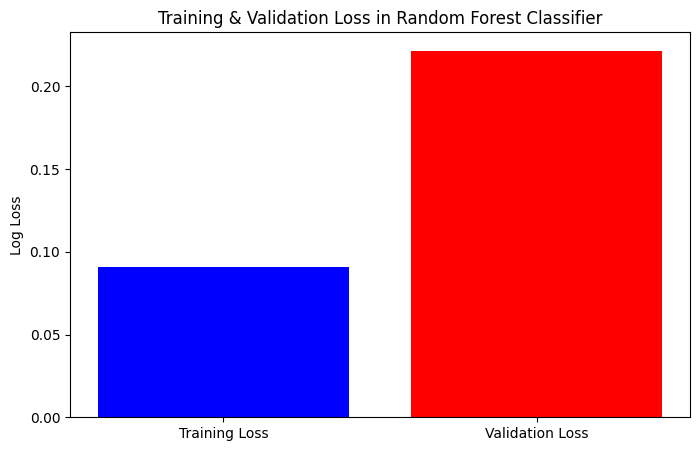

In [22]:
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
y_train_pred_prob = rf.predict_proba(X_train)
y_val_pred_prob = rf.predict_proba(X_test)

from sklearn.metrics import log_loss
# Calculate log loss
train_loss = log_loss(y_train, y_train_pred_prob)
val_loss = log_loss(y_test, y_val_pred_prob)

# Plotting the training and validation losses
plt.figure(figsize=(8, 5))
plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'red'])
plt.title('Training & Validation Loss in Random Forest Classifier')
plt.ylabel('Log Loss')
plt.show()